In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import os

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [60]:
sensor_coords = {
    "R1": (1, 4), "R2": (2, 4), "R3": (3, 4),
    "R4": (4, 3), "R5": (4, 2), "R6": (4, 1),
    "R7": (1, 0), "R8": (2, 0), "R9": (3, 0),
    "R10": (0, 1), "R11": (0, 2), "R12": (0, 3)
}

In [61]:
#force_coords={"P1":(3,1),"P2":(2,1),"P3":(1,1),"P4":(1,2),"P5":(2,2),"P6":(3,2),"P7":(3,3),"P8":(2,3),"P9":(1,1)}
force_coords={1:(3,1),2:(2,1),3:(1,1),4:(1,2),5:(2,2),6:(3,2),7:(3,3),8:(2,3),9:(1,1)}

In [62]:
#concent=9
#depth=6
#nloop=1
#pp=2
#force_file='{}/{} phr {}mm force_loop{}_P{}.csv'.format(force_folder_loop1,concent,depth,nloop,pp)
#force_dat=pd.read_csv(force_file)
def get_df_R1_12_w(folder_path,thickness,fileforce_folder,resistance_folder,outputR,num_loop):
    listforce=[]
    listpos=[]
    listdepth=[]
    listpos=[]
    listr1=[]
    listr2=[]
    listr3=[]
    listr4=[]
    listr5=[]
    listr6=[]
    listr7=[]
    listr8=[]
    listr9=[]
    listr10=[]
    listr11=[]
    listr12=[]

    listfiles=os.listdir(folder_path)
    #print(os.listdir("{}".format(resistance_folder))[0].split()[0])
    
    concentrate=int(os.listdir("{}".format(resistance_folder))[0].split()[0])
    
    #fileforce_name="loop 1.csv"
    #loadforce=pd.read_csv("{}/{}".format(folder_path,fileforce_name))
    #raw/drive-download/13-06-2025/Contact probe of 8 mm diameter (9 position)/Force/loop1/9 phr 6mm force_loop1_P1.csv
    
    for pp in range(1,10):
        #raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_1/loop1/9 phr 6mm force_loop1_P1.csv
        fileforce_name="{}/{} phr {}mm force_loop{}_P{}.csv".format(fileforce_folder,concentrate,thickness,num_loop,pp)
        loadforce=pd.read_csv(fileforce_name)
        
    #print(loadforce)
        for i in range(1,11):
            listdepth.append(5*i*thickness/100)
            #concent="{} {} {}mm {}_{}_".format(listfiles[0].split()[0],listfiles[0].split()[1],thickness,listfiles[0].split()[-1][:-3],5*i)
            #fileresist="{}/{}/dat00001.csv".format(folder_path,concent)
            #raw/drive-download/13-06-2025/Contact probe of 3 cm diameter (1 position)/loop1/9 phr 6mm loop1_R1-12_5
            #raw/drive-download/13-06-2025/Contact probe of 8 mm diameter (9 position)/loop1/9 phr 6mm loop1_R1-12_P1_5/dat00001.csv
            fileresist="{}/{} phr {}mm loop{}_{}_P{}_{}/dat00001.csv".format(resistance_folder,concentrate,thickness,num_loop,outputR,pp,5*i)
            
            #print(fileresist)
            getresist=pd.read_csv(fileresist)
            
            getmeans=getresist.iloc[:,2:].mean().values
            #print(f"point {pp}: means {getmeans}")
            #if (pp==4): 
            #    plt.plot(getresist.iloc[:,2:])
            #    plt.plot(np.ones(len(getresist.iloc[:,2:]))*getmeans)
            #    plt.show()
            
            listr1.append(getmeans[0])
            listr2.append(getmeans[1])
            listr3.append(getmeans[2])
            listr4.append(getmeans[3])
            listr5.append(getmeans[4])
            listr6.append(getmeans[5])
            listr7.append(getmeans[6])
            listr8.append(getmeans[7])
            listr9.append(getmeans[8])
            listr10.append(getmeans[9])
            listr11.append(getmeans[10])
            listr12.append(getmeans[11])
            listpos.append(pp)
            test_path=loadforce.iloc[2:,3*i-2].dropna().astype(float)
            listforce.append(max(test_path))
    df=pd.DataFrame({"depth":listdepth,"force":listforce,"position":listpos,"r1":listr1,"r2":listr2,"r3":listr3,"r4":listr4,"r5":listr5,"r6":listr6,"r7":listr7,"r8":listr8,"r9":listr9,"r10":listr10,"r11":listr11,"r12":listr12})
    return df
    
            

In [63]:
folder_path='raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)'

In [64]:
sample=2
if sample==1:
    resistfile_loop1="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_1/loop1"
    resistfile_loop2="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_1/loop2"
    resistfile_loop3="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_1/loop3"
    #raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_1/loop1/9 phr 6mm force_loop1_P1.csv
    fileforce_loop1="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_1/loop1"
    fileforce_loop2="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_1/loop2"
    fileforce_loop3="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_1/loop3"
elif sample==2:
    resistfile_loop1="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_2/loop1"
    resistfile_loop2="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_2/loop2"
    resistfile_loop3="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_2/loop3"
    resistfile_loop4="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_2/loop4"
    resistfile_loop5="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Sample_2/loop5"
    #raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_1/loop1/9 phr 6mm force_loop1_P1.csv
    fileforce_loop1="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_2/loop1"
    fileforce_loop2="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_2/loop2"
    fileforce_loop3="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_2/loop3"
    fileforce_loop4="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_2/loop4"
    fileforce_loop5="raw/drive-download/02-07-2025/Contact probe of 8 mm diameter (9 position)/Force Sample_2/loop5"

#resistfile_loop4="raw/drive-download/13-06-2025/Contact probe of 3 cm diameter (1 position)/loop4"
#resistfile_loop5="raw/drive-download/13-06-2025/Contact probe of 3 cm diameter (1 position)/loop5"
#resistfile_loop6="raw/drive-download/13-06-2025/Contact probe of 3 cm diameter (1 position)/loop6"
#resistfile_loop7="raw/drive-download/13-06-2025/Contact probe of 3 cm diameter (1 position)/loop7"

In [49]:
if sample==1:
    df_loop1=get_df_R1_12_w(folder_path,6,fileforce_loop1,resistfile_loop1,"R1-12",1)
    df_loop2=get_df_R1_12_w(folder_path,6,fileforce_loop2,resistfile_loop2,"R1-12",2)
    df_loop3=get_df_R1_12_w(folder_path,6,fileforce_loop3,resistfile_loop3,"R1-12",3)
elif sample==2:
    df_loop1=get_df_R1_12_w(folder_path,6,fileforce_loop1,resistfile_loop1,"R1-12",1)
    df_loop2=get_df_R1_12_w(folder_path,6,fileforce_loop2,resistfile_loop2,"R1-12",2)
    df_loop3=get_df_R1_12_w(folder_path,6,fileforce_loop3,resistfile_loop3,"R1-12",3)
    df_loop4=get_df_R1_12_w(folder_path,6,fileforce_loop4,resistfile_loop4,"R1-12",4)
    df_loop5=get_df_R1_12_w(folder_path,6,fileforce_loop5,resistfile_loop5,"R1-12",5)
    



Model: MLPRegressor
 DEPTH - R² train: 0.9781 | R² test: 0.5308
 FORCE - R² train: 0.9904 | R² test: 0.6956
 POSITION - R² train: 0.9955 | R² test: 0.7981

Model: RandomForest
 DEPTH - R² train: 0.9176 | R² test: 0.4391
 FORCE - R² train: 0.9253 | R² test: 0.5792
 POSITION - R² train: 0.9769 | R² test: 0.7241

Model: XGBoost
 DEPTH - R² train: 1.0000 | R² test: 0.5442
 FORCE - R² train: 1.0000 | R² test: 0.6594
 POSITION - R² train: 1.0000 | R² test: 0.7605


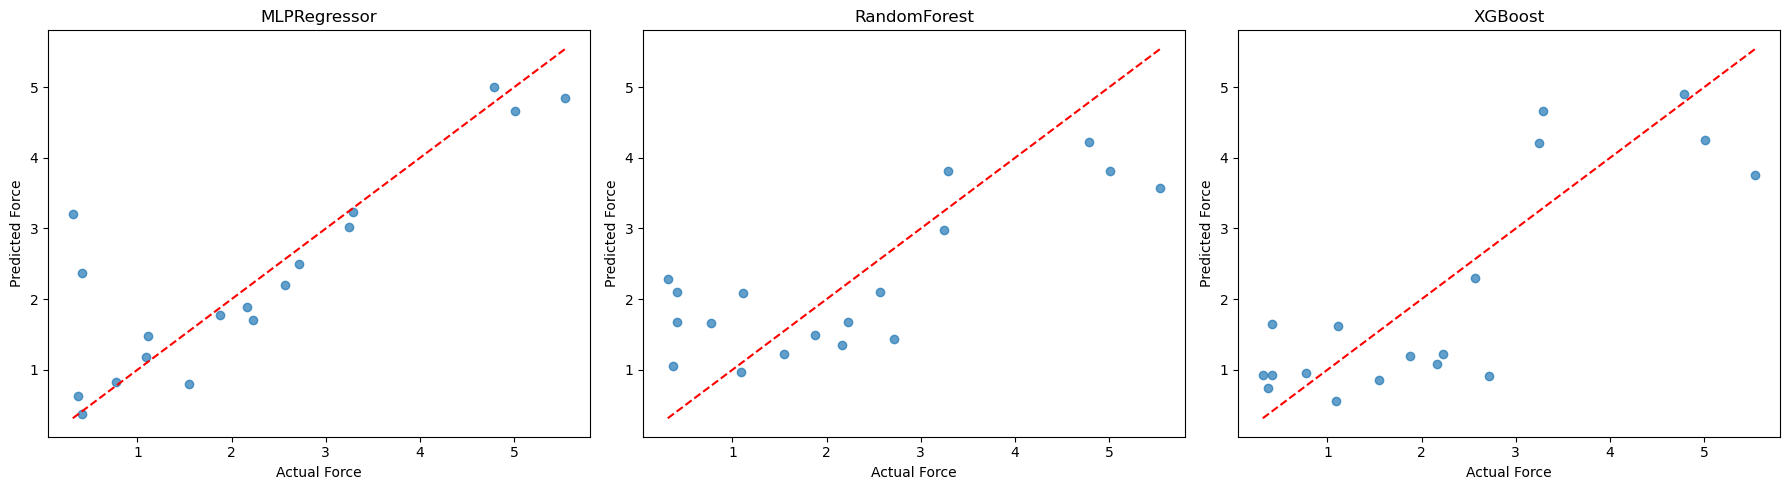

In [65]:
# === Load your CSV file ===
df = df_loop4

# === Define Features and Targets ===
X = df[[f"r{i}" for i in range(1, 13)]]
y = df[["depth", "force", "position"]]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Define models ===
models = {
    "MLPRegressor": make_pipeline(StandardScaler(), MultiOutputRegressor(
        MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=2000, random_state=42))),
    
    "RandomForest": MultiOutputRegressor(
        RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
    
    "XGBoost": MultiOutputRegressor(
        XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, objective='reg:squarederror'))
}

# === Train and evaluate ===
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f"\nModel: {name}")
    for i, col in enumerate(["depth", "force", "position"]):
        r2_train = r2_score(y_train.iloc[:, i], y_pred_train[:, i])
        r2_test = r2_score(y_test.iloc[:, i], y_pred_test[:, i])
        print(f" {col.upper()} - R² train: {r2_train:.4f} | R² test: {r2_test:.4f}")
        
        if r2_train < 0.95:
            print(f"Warning: R² on training for {col} is below 0.95")



# To store predictions for force for each model
model_force_preds = {}

# Train, predict, and store results for each model (modified block)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    # Store actual and predicted force (column index 1 for 'force')
    model_force_preds[name] = (y_test["force"].values, y_pred_test[:, 1])

# Plot comparison for all models
plt.figure(figsize=(18, 5))
for idx, (name, (y_true, y_pred)) in enumerate(model_force_preds.items()):
    plt.subplot(1, 3, idx+1)
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Force")
    plt.ylabel("Predicted Force")
    plt.title(f"{name}")
plt.tight_layout()
plt.show()


R² Scores:
DEPTH — R² Train: 0.9846 | R² Test: -2.1464
FORCE — R² Train: 0.9849 | R² Test: -0.9221
POSITION — R² Train: 0.9960 | R² Test: 0.3862


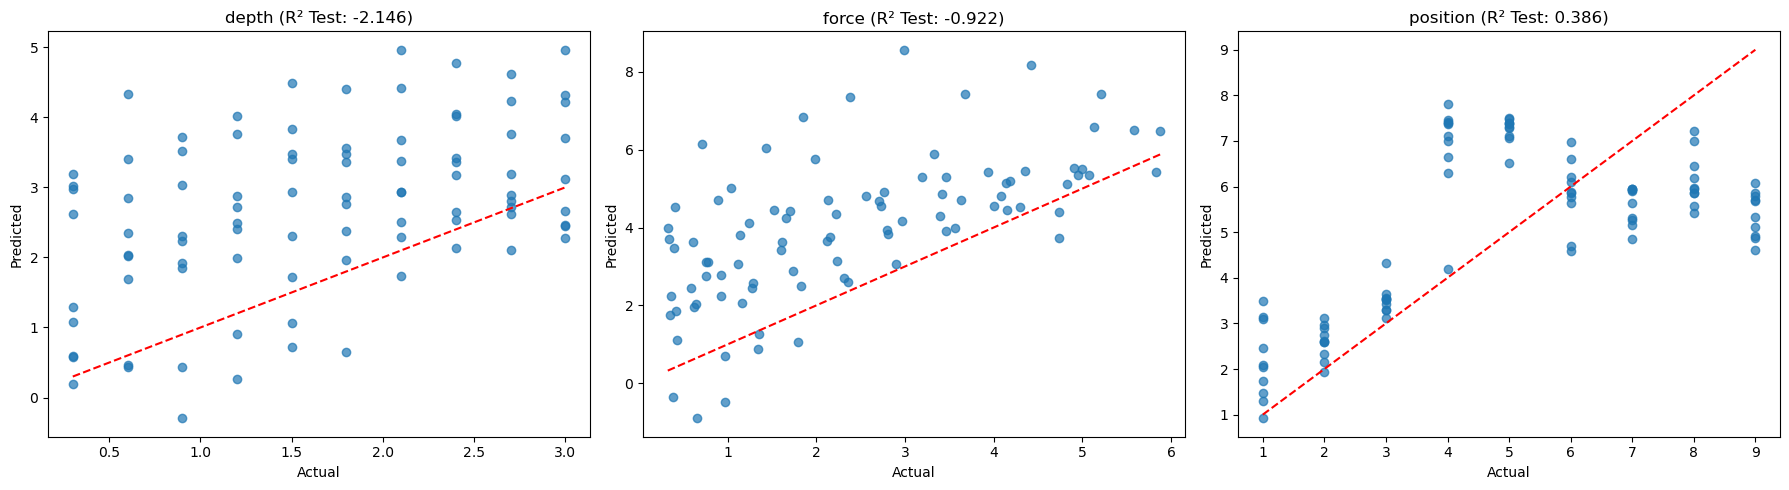

In [54]:

# === Combine df_loop1 and df_loop2 for training ===
df_train = pd.concat([df_loop1, df_loop2,df_loop3,df_loop4], ignore_index=True)
df_test = df_loop5

# === Define features and targets ===
features = [f"r{i}" for i in range(1, 13)]
targets = ["depth", "force", "position"]

X_train = df_train[features]
y_train = df_train[targets]

X_test = df_test[features]
y_test = df_test[targets]

# === Define and train the model ===
mlp_model = make_pipeline(StandardScaler(), MultiOutputRegressor(
    MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=2000, random_state=42)))
mlp_model.fit(X_train, y_train)

# === Predict ===
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

# === Print R² scores ===
print("R² Scores:")
for i, target in enumerate(targets):
    r2_train = r2_score(y_train.iloc[:, i], y_train_pred[:, i])
    r2_test = r2_score(y_test.iloc[:, i], y_test_pred[:, i])
    print(f"{target.upper()} — R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")

# === Plot Actual vs Predicted ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axes):
    ax.scatter(y_test.iloc[:, i], y_test_pred[:, i], alpha=0.7)
    ax.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
            [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(f"{targets[i]} (R² Test: {r2_score(y_test.iloc[:, i], y_test_pred[:, i]):.3f})")

plt.tight_layout()
plt.show()


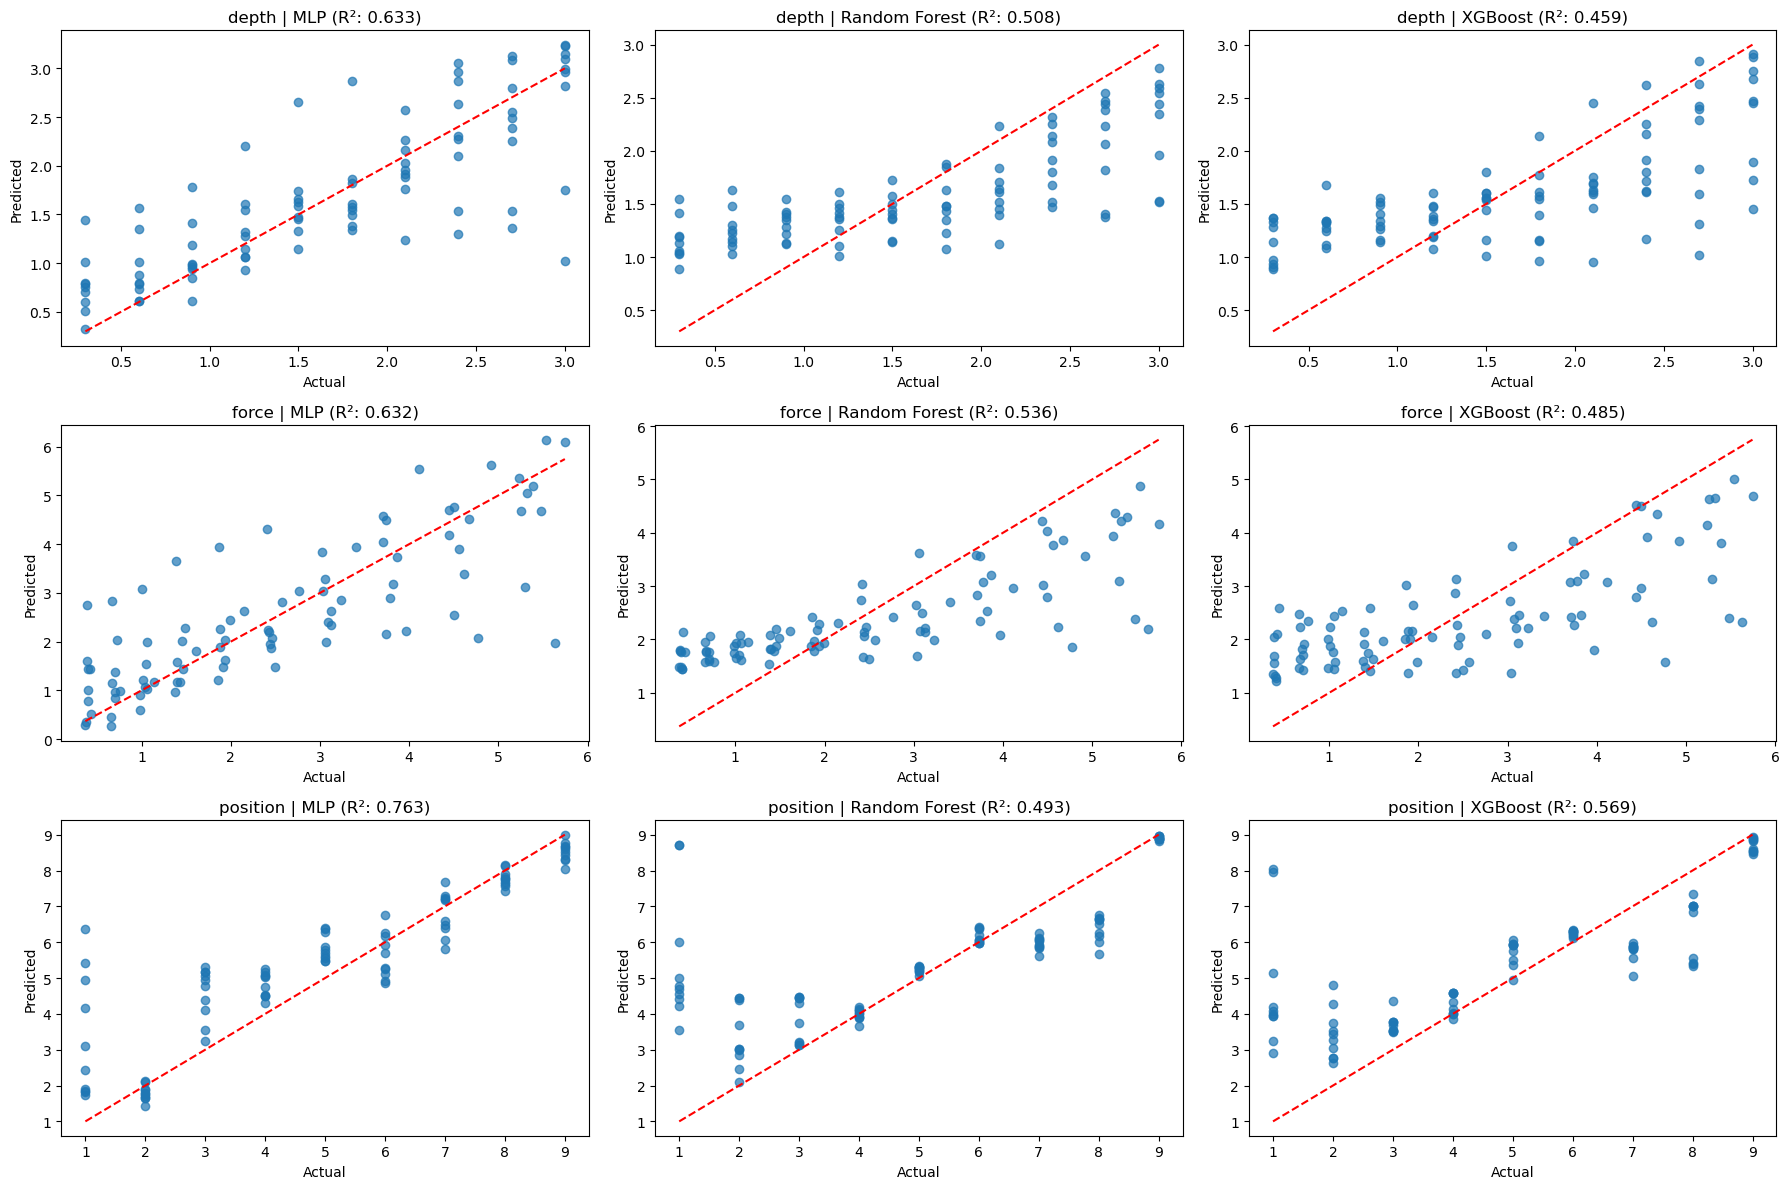


R² Scores by Model and Target
Target: DEPTH
  MLP:           R² = 0.6333
  Random Forest: R² = 0.5076
  XGBoost:       R² = 0.4593
Target: FORCE
  MLP:           R² = 0.6324
  Random Forest: R² = 0.5358
  XGBoost:       R² = 0.4847
Target: POSITION
  MLP:           R² = 0.7631
  Random Forest: R² = 0.4935
  XGBoost:       R² = 0.5693

Position Classification Accuracy (LogReg): 0.8778


In [44]:

# === Prepare training and test sets ===
df_train = pd.concat([df_loop1, df_loop2,df_loop3,df_loop4], ignore_index=True)
df_test = df_loop5

features = [f"r{i}" for i in range(1, 13)]
targets = ["depth", "force", "position"]

X_train = df_train[features]
y_train = df_train[targets]
X_test = df_test[features]
y_test = df_test[targets]

# === Apply polynomial features for MLP only ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# === Train models ===

## MLP Regressor
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=3000, random_state=42))
])
mlp_model = MultiOutputRegressor(mlp_pipeline)
mlp_model.fit(X_train_poly, y_train)
y_pred_mlp = mlp_model.predict(X_test_poly)
r2_mlp = [r2_score(y_test.iloc[:, i], y_pred_mlp[:, i]) for i in range(3)]

## Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = [r2_score(y_test.iloc[:, i], y_pred_rf[:, i]) for i in range(3)]

## XGBoost (simplified for speed)
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, objective='reg:squarederror'))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = [r2_score(y_test.iloc[:, i], y_pred_xgb[:, i]) for i in range(3)]

## Logistic Regression for position classification
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])
clf.fit(X_train, y_train['position'].astype(int))
pos_pred = clf.predict(X_test)
acc_pos = accuracy_score(y_test['position'].astype(int), pos_pred)

# === Plot actual vs predicted ===
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
model_names = ["MLP", "Random Forest", "XGBoost"]
predictions = [y_pred_mlp, y_pred_rf, y_pred_xgb]
r2_scores = [r2_mlp, r2_rf, r2_xgb]

for col in range(3):  # model
    for row in range(3):  # target
        ax = axes[row, col]
        ax.scatter(y_test.iloc[:, row], predictions[col][:, row], alpha=0.7)
        ax.plot([y_test.iloc[:, row].min(), y_test.iloc[:, row].max()],
                [y_test.iloc[:, row].min(), y_test.iloc[:, row].max()], 'r--')
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.set_title(f"{targets[row]} | {model_names[col]} (R²: {r2_scores[col][row]:.3f})")

plt.tight_layout()
plt.show()

# === Print R² scores and accuracy ===
print("\nR² Scores by Model and Target")
for i, target in enumerate(targets):
    print(f"Target: {target.upper()}")
    print(f"  MLP:           R² = {r2_mlp[i]:.4f}")
    print(f"  Random Forest: R² = {r2_rf[i]:.4f}")
    print(f"  XGBoost:       R² = {r2_xgb[i]:.4f}")
print(f"\nPosition Classification Accuracy (LogReg): {acc_pos:.4f}")


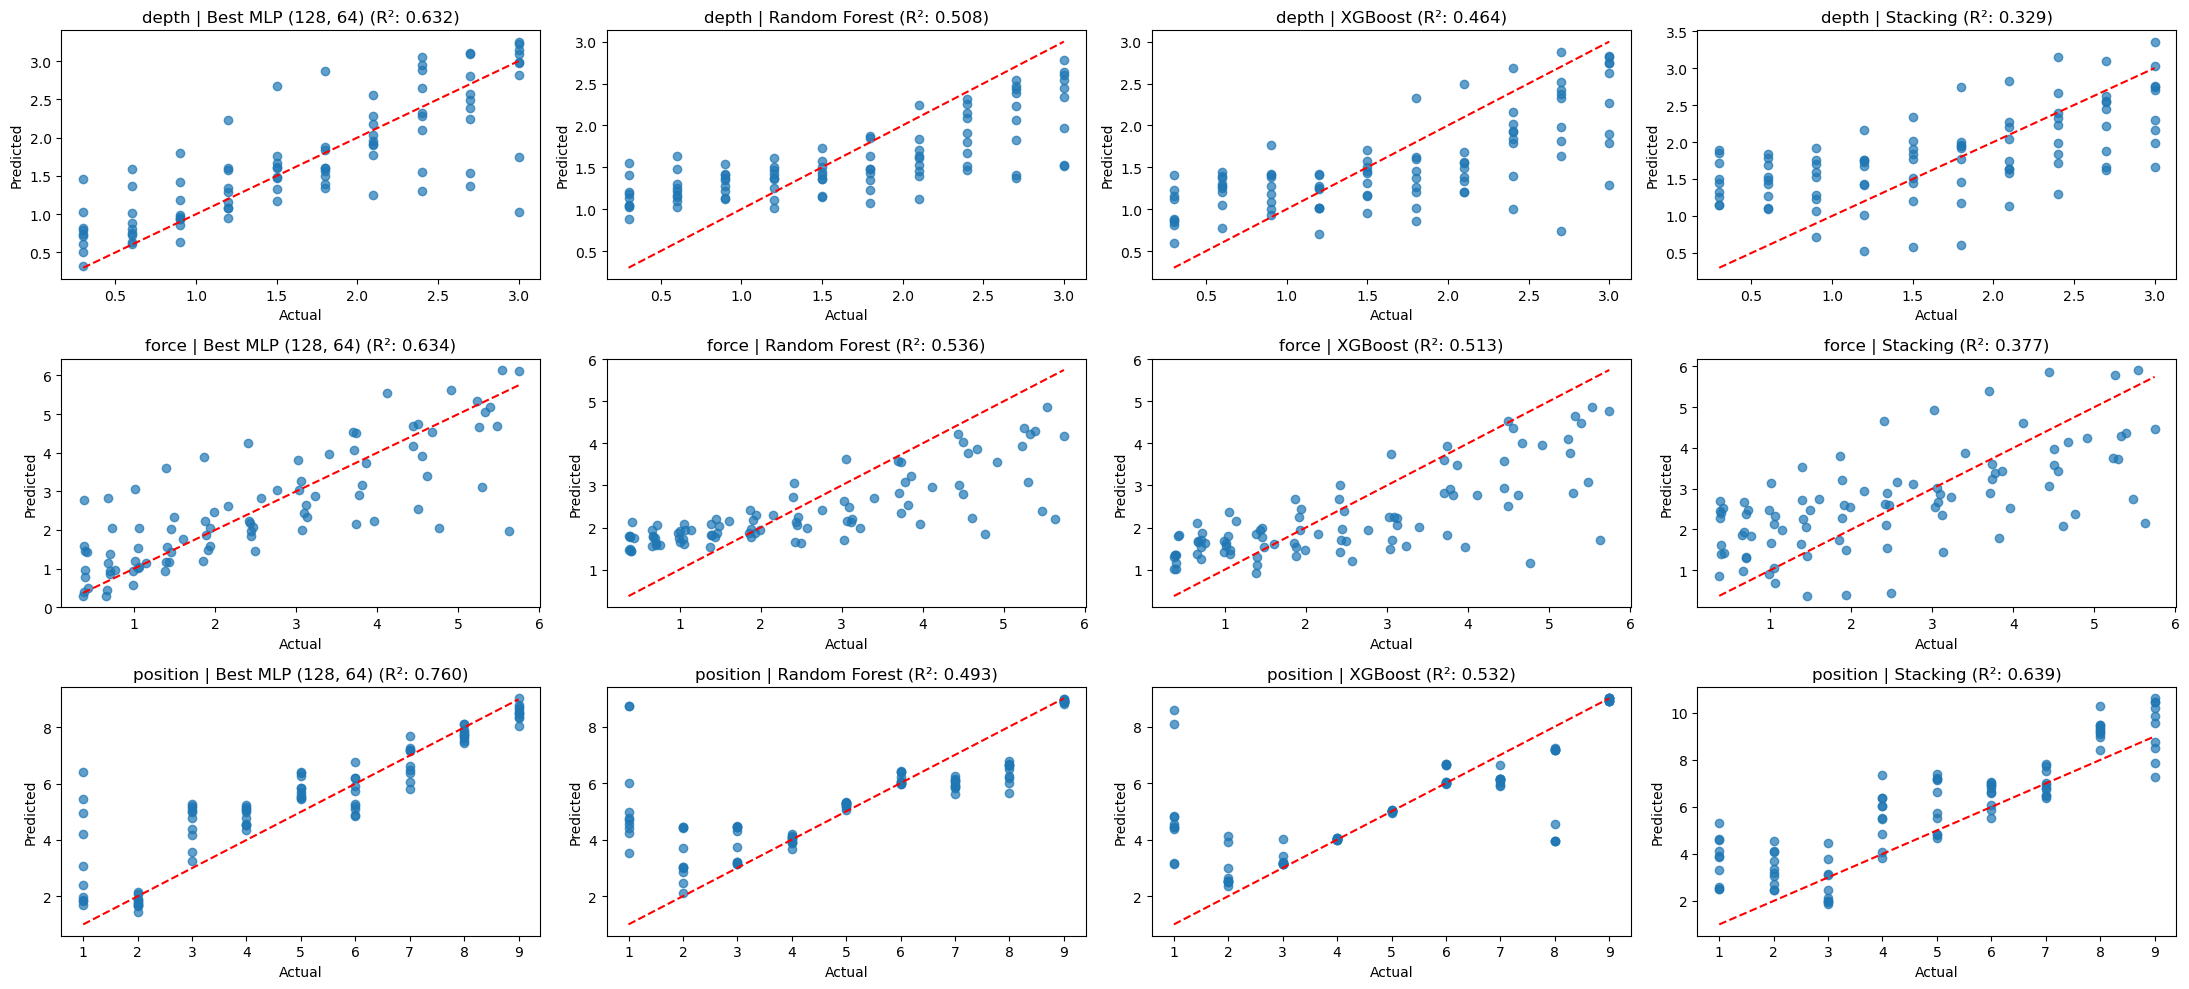


R² Scores by Model and Target:
Target: DEPTH
  Best MLP:      R² = 0.6319 (arch: (128, 64))
  Random Forest: R² = 0.5076
  XGBoost:       R² = 0.4636
  Stacking:      R² = 0.3289
Target: FORCE
  Best MLP:      R² = 0.6341 (arch: (128, 64))
  Random Forest: R² = 0.5358
  XGBoost:       R² = 0.5134
  Stacking:      R² = 0.3770
Target: POSITION
  Best MLP:      R² = 0.7598 (arch: (128, 64))
  Random Forest: R² = 0.4935
  XGBoost:       R² = 0.5316
  Stacking:      R² = 0.6388


Exception ignored in: <function ResourceTracker.__del__ at 0x7f5e5554a340>
Traceback (most recent call last):
  File "/home/sarun/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/sarun/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/sarun/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f696691a340>
Traceback (most recent call last):
  File "/home/sarun/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/sarun/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/sarun/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

df_train = pd.concat([df_loop1, df_loop2], ignore_index=True)
df_test = df_loop3

features = [f"r{i}" for i in range(1, 13)]
targets = ["depth", "force", "position"]

X_train, X_test = df_train[features], df_test[features]
y_train, y_test = df_train[targets], df_test[targets]

# =======Polynomial features for MLP =======
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# ======= Base Models =======
mlp_configs = [
    {'hidden_layer_sizes': (128, 64), 'alpha': 0.001, 'max_iter': 3000},
    {'hidden_layer_sizes': (256, 128, 64), 'alpha': 0.0005, 'max_iter': 4000},
    {'hidden_layer_sizes': (256, 128, 64, 32), 'alpha': 0.0001, 'max_iter': 5000},
]

mlp_results = []
for cfg in mlp_configs:
    mlp = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(
            hidden_layer_sizes=cfg['hidden_layer_sizes'],
            alpha=cfg['alpha'],
            max_iter=cfg['max_iter'],
            random_state=42))
    ])
    model = MultiOutputRegressor(mlp)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    r2s = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(3)]
    mlp_results.append({'config': cfg, 'r2': r2s, 'model': model, 'y_pred': y_pred})

# Best MLP based on mean R² across all targets
best_idx = np.argmax([np.mean(res['r2']) for res in mlp_results])
best_mlp = mlp_results[best_idx]

# Random Forest
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = [r2_score(y_test.iloc[:, i], y_pred_rf[:, i]) for i in range(3)]

# XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, objective='reg:squarederror', verbosity=0))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = [r2_score(y_test.iloc[:, i], y_pred_xgb[:, i]) for i in range(3)]

# =======StackingRegressor =======
# For stacking, use base models on original features for speed
stacking_reg = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, objective='reg:squarederror', verbosity=0)),
        ('mlp', Pipeline([
            ('scaler', StandardScaler()),
            ('mlp', MLPRegressor(hidden_layer_sizes=(128,64), alpha=0.001, max_iter=3000, random_state=42))
        ]))
    ],
    final_estimator=Ridge(alpha=1.0),
    passthrough=True,
    n_jobs=1
)
stacked_model = MultiOutputRegressor(stacking_reg)
stacked_model.fit(X_train, y_train)
y_pred_stacked = stacked_model.predict(X_test)
r2_stacked = [r2_score(y_test.iloc[:, i], y_pred_stacked[:, i]) for i in range(3)]

# ======= Plotting =======
model_names = [
    f"Best MLP {best_mlp['config']['hidden_layer_sizes']}",
    "Random Forest",
    "XGBoost",
    "Stacking"
]
predictions = [
    best_mlp['y_pred'],
    y_pred_rf,
    y_pred_xgb,
    y_pred_stacked
]
r2_scores = [
    best_mlp['r2'],
    r2_rf,
    r2_xgb,
    r2_stacked
]

fig, axes = plt.subplots(3, 4, figsize=(22, 10))
for col in range(4):  # model
    for row in range(3):  # target
        ax = axes[row, col]
        ax.scatter(y_test.iloc[:, row], predictions[col][:, row], alpha=0.7)
        ax.plot([y_test.iloc[:, row].min(), y_test.iloc[:, row].max()],
                [y_test.iloc[:, row].min(), y_test.iloc[:, row].max()], 'r--')
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.set_title(f"{targets[row]} | {model_names[col]} (R²: {r2_scores[col][row]:.3f})")

plt.tight_layout()
plt.show()

print("\nR² Scores by Model and Target:")
for i, target in enumerate(targets):
    print(f"Target: {target.upper()}")
    print(f"  Best MLP:      R² = {best_mlp['r2'][i]:.4f} (arch: {best_mlp['config']['hidden_layer_sizes']})")
    print(f"  Random Forest: R² = {r2_rf[i]:.4f}")
    print(f"  XGBoost:       R² = {r2_xgb[i]:.4f}")
    print(f"  Stacking:      R² = {r2_stacked[i]:.4f}")


Training models with cross-validation...

Training MLP_Regularized...
  CV R² - Depth: 0.4020, Force: 0.4863
  Test R² - Depth: -4.1899, Force: -4.4189

Training RF_Regularized...
  CV R² - Depth: 0.3494, Force: 0.3877
  Test R² - Depth: -0.1290, Force: -0.1285

Training XGB_Regularized...
  CV R² - Depth: 0.4051, Force: 0.4392
  Test R² - Depth: -0.3098, Force: -0.1908

Training GBM...
  CV R² - Depth: 0.4211, Force: 0.4614
  Test R² - Depth: -0.3054, Force: -0.3079

Training Ridge...
  CV R² - Depth: 0.1671, Force: 0.2220
  Test R² - Depth: -0.0841, Force: 0.0085

Training ElasticNet...
  CV R² - Depth: 0.0567, Force: 0.1758
  Test R² - Depth: -0.1243, Force: -0.0729

Training position classifier...
Position CV Accuracy: 0.8972 (±0.0142)
Position Test Accuracy: 0.4667

Performing hyperparameter tuning...
Fitting XGBoost with tuned parameters...
Fitting Random Forest with tuned parameters...


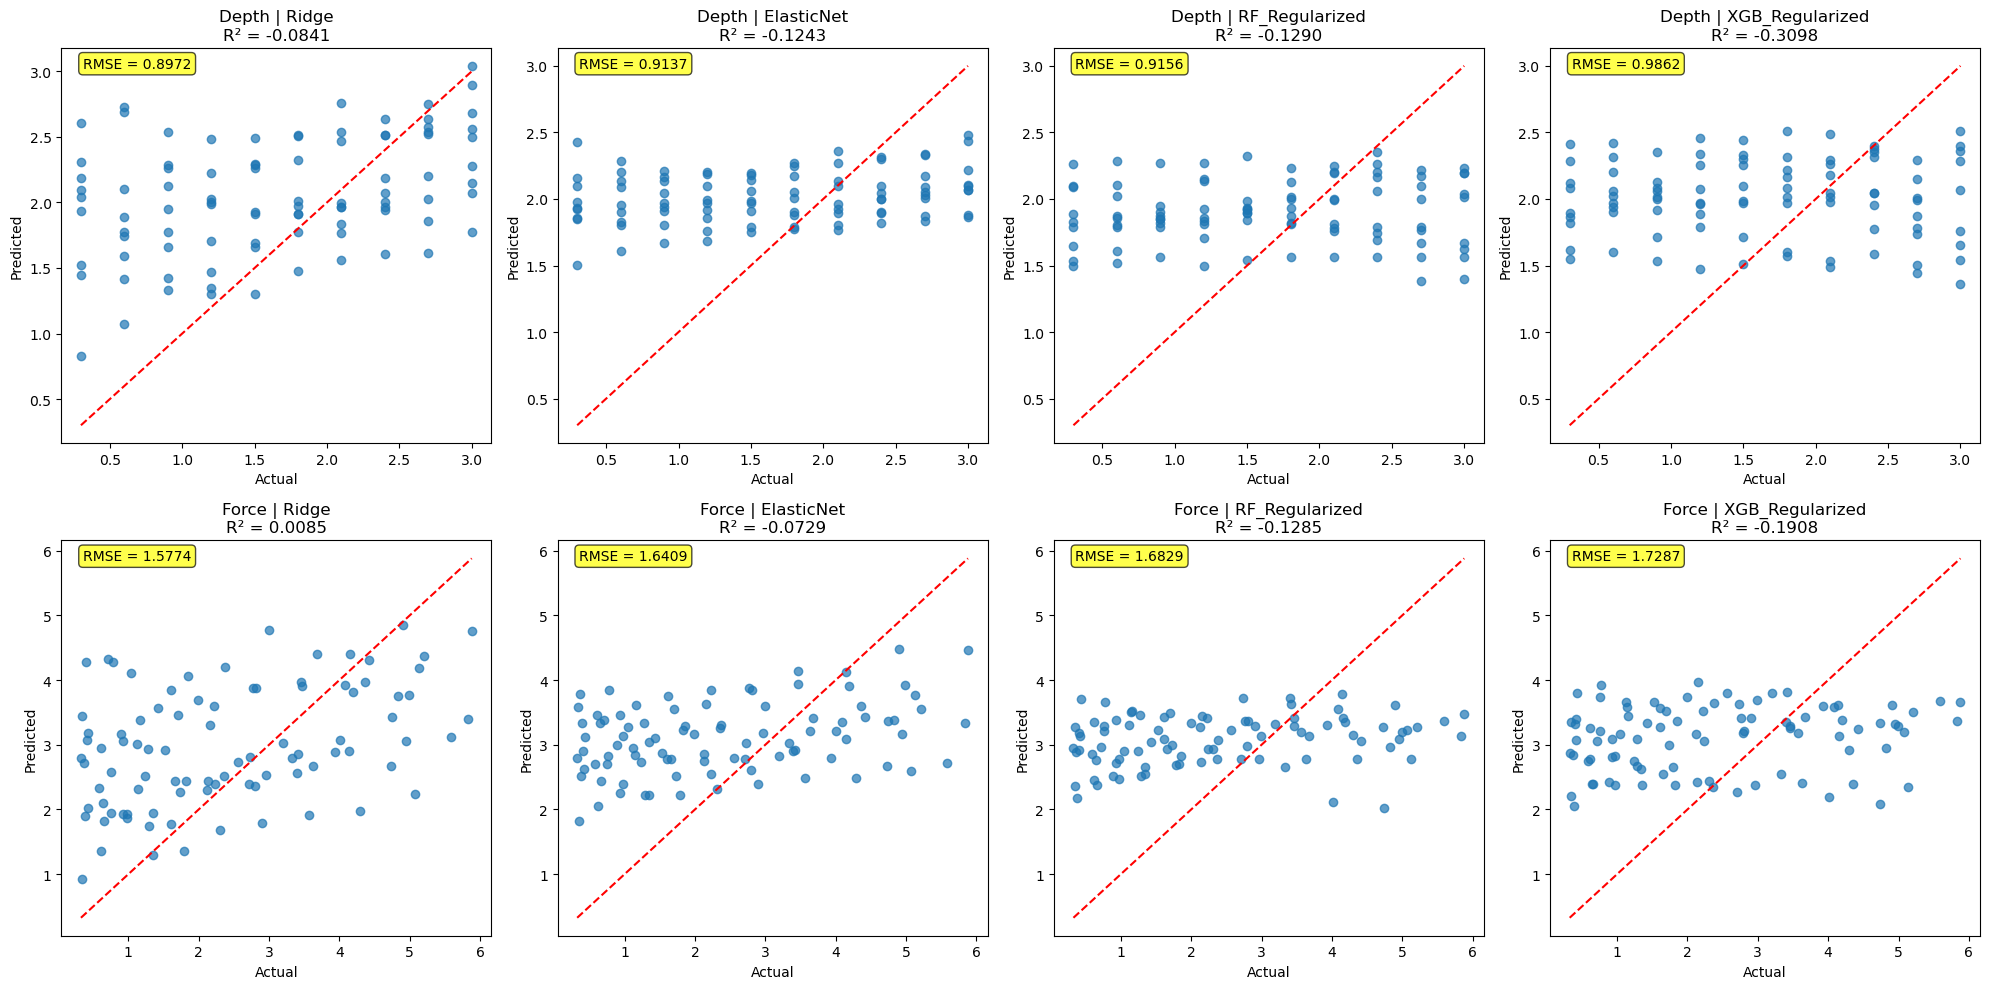


FINAL RESULTS SUMMARY

Regression Models (R² Scores):

MLP_Regularized:
  Depth:  R² = -4.1899
  Force:  R² = -4.4189
  Average: R² = -4.3044
  CV Scores: [0.40202066 0.48625321]

RF_Regularized:
  Depth:  R² = -0.1290
  Force:  R² = -0.1285
  Average: R² = -0.1288
  CV Scores: [0.3494321  0.38768331]

XGB_Regularized:
  Depth:  R² = -0.3098
  Force:  R² = -0.1908
  Average: R² = -0.2503
  CV Scores: [0.40509207 0.43916794]

GBM:
  Depth:  R² = -0.3054
  Force:  R² = -0.3079
  Average: R² = -0.3067
  CV Scores: [0.42107612 0.46137944]

Ridge:
  Depth:  R² = -0.0841
  Force:  R² = 0.0085
  Average: R² = -0.0378
  CV Scores: [0.16712545 0.22200893]

ElasticNet:
  Depth:  R² = -0.1243
  Force:  R² = -0.0729
  Average: R² = -0.0986
  CV Scores: [0.05665796 0.17576067]

XGB_Tuned:
  Depth:  R² = -0.5318
  Force:  R² = -0.3759
  Average: R² = -0.4538

RF_Tuned:
  Depth:  R² = -0.2142
  Force:  R² = -0.3528
  Average: R² = -0.2835

Position Classification:
  Test Accuracy: 0.4667
  CV Accura

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, ElasticNet, LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

# === Prepare training and test sets ===
df_train = pd.concat([df_loop1, df_loop2, df_loop3, df_loop4], ignore_index=True)
df_test = df_loop5

features = [f"r{i}" for i in range(1, 13)]
targets = ["depth", "force", "position"]

X_train = df_train[features]
y_train = df_train[targets]
X_test = df_test[features]
y_test = df_test[targets]

# === Enhanced preprocessing with feature selection ===
def create_enhanced_features(X_train, X_test, max_features=None):
    """Create polynomial features with feature selection to prevent overfitting"""
    # Create polynomial features (reduced degree to prevent overfitting)
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Feature selection to reduce dimensionality
    if max_features is None:
        max_features = min(50, X_train_poly.shape[1])  # Limit features
    
    selector = SelectKBest(score_func=f_regression, k=max_features)
    X_train_selected = selector.fit_transform(X_train_poly, y_train.iloc[:, 0])  # Use first target for selection
    X_test_selected = selector.transform(X_test_poly)
    
    return X_train_selected, X_test_selected

# === Cross-validation setup ===
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# === Enhanced model definitions with regularization ===
models = {}

# 1. Regularized Neural Network with early stopping simulation
models['MLP_Regularized'] = Pipeline([
    ('scaler', RobustScaler()),  # More robust to outliers
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(64, 32),  # Smaller network to prevent overfitting
        max_iter=2000,
        alpha=0.01,  # L2 regularization
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42
    ))
])

# 2. Regularized Random Forest
models['RF_Regularized'] = RandomForestRegressor(
    n_estimators=100,  # Reduced from 200
    max_depth=8,       # Reduced from 10
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',  # Feature bagging
    random_state=42
)

# 3. Regularized XGBoost
models['XGB_Regularized'] = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,  # Reduced learning rate
    subsample=0.8,       # Sample bagging
    colsample_bytree=0.8,  # Feature bagging
    reg_alpha=0.1,       # L1 regularization
    reg_lambda=1.0,      # L2 regularization
    random_state=42
)

# 4. Gradient Boosting (alternative to XGB)
models['GBM'] = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# 5. Ridge Regression (linear baseline)
models['Ridge'] = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# 6. Elastic Net (combines L1 and L2 regularization)
models['ElasticNet'] = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=2000))
])

# === Hyperparameter tuning for best models ===
def tune_hyperparameters(X_train, y_train, cv):
    """Perform hyperparameter tuning for selected models"""
    
    # XGBoost tuning
    xgb_params = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1],
        'reg_alpha': [0.01, 0.1, 1.0],
        'reg_lambda': [0.1, 1.0, 10.0]
    }
    
    xgb_grid = GridSearchCV(
        MultiOutputRegressor(XGBRegressor(random_state=42)),
        {'estimator__' + k: v for k, v in xgb_params.items()},
        cv=3,  # Reduced CV folds for speed
        scoring='r2',
        n_jobs=-1
    )
    
    # Random Forest tuning
    rf_params = {
        'n_estimators': [50, 100, 150],
        'max_depth': [6, 8, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf_grid = GridSearchCV(
        MultiOutputRegressor(RandomForestRegressor(random_state=42)),
        {'estimator__' + k: v for k, v in rf_params.items()},
        cv=3,
        scoring='r2',
        n_jobs=1
    )
    
    return xgb_grid, rf_grid

# === Train and evaluate models ===
print("Training models with cross-validation...")

results = {}
predictions = {}

# Create enhanced features for MLP
X_train_enhanced, X_test_enhanced = create_enhanced_features(X_train, X_test)

# Define regression targets only
regression_targets = ['depth', 'force']
y_train_reg = y_train[regression_targets]
y_test_reg = y_test[regression_targets]

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use enhanced features for MLP, regular features for others
    if 'MLP' in name:
        X_tr, X_te = X_train_enhanced, X_test_enhanced
    else:
        X_tr, X_te = X_train, X_test
    
    # Wrap non-pipeline models in MultiOutputRegressor
    if name in ['RF_Regularized', 'XGB_Regularized', 'GBM']:
        model = MultiOutputRegressor(model)
    
    # Cross-validation for multi-output
    try:
        # For multi-output CV, we need to handle it differently
        cv_scores = []
        for fold, (train_idx, val_idx) in enumerate(cv.split(X_tr)):
            # Handle both DataFrame and numpy array cases
            if hasattr(X_tr, 'iloc'):
                X_train_fold, X_val_fold = X_tr.iloc[train_idx], X_tr.iloc[val_idx]
                y_train_fold, y_val_fold = y_train_reg.iloc[train_idx], y_train_reg.iloc[val_idx]
            else:
                X_train_fold, X_val_fold = X_tr[train_idx], X_tr[val_idx]
                y_train_fold, y_val_fold = y_train_reg.iloc[train_idx], y_train_reg.iloc[val_idx]
            
            # Clone the model for this fold
            fold_model = clone(model)
            fold_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = fold_model.predict(X_val_fold)
            
            # Ensure predictions are 2D
            if y_pred_fold.ndim == 1:
                y_pred_fold = y_pred_fold.reshape(-1, 1)
            
            # Calculate R² for each target - handle both DataFrame and array cases
            fold_r2 = []
            for i in range(min(2, y_pred_fold.shape[1])):
                if hasattr(y_val_fold, 'iloc'):
                    y_true = y_val_fold.iloc[:, i]
                else:
                    y_true = y_val_fold[:, i]
                y_pred_i = y_pred_fold[:, i]
                fold_r2.append(r2_score(y_true, y_pred_i))
            
            cv_scores.append(fold_r2)
        
        # Average CV scores across folds
        cv_scores = np.array(cv_scores)
        mean_cv_scores = cv_scores.mean(axis=0)
        
        # Ensure we have scores for both targets
        if len(mean_cv_scores) == 1:
            mean_cv_scores = [mean_cv_scores[0], mean_cv_scores[0]]
        
    except Exception as e:
        print(f"  CV failed for {name}: {e}")
        mean_cv_scores = [0.0, 0.0]
    
    # Fit model on full training data
    model.fit(X_tr, y_train_reg)
    y_pred = model.predict(X_te)
    
    # Ensure predictions are 2D
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)
    
    # Calculate R² scores - handle prediction dimensions properly
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)
    
    r2_scores = []
    for i in range(min(2, y_pred.shape[1])):
        r2_scores.append(r2_score(y_test_reg.iloc[:, i], y_pred[:, i]))
    
    # Ensure we have scores for both targets
    if len(r2_scores) == 1:
        r2_scores = [r2_scores[0], r2_scores[0]]
    
    results[name] = {
        'cv_scores': mean_cv_scores,
        'test_r2': r2_scores,
        'predictions': y_pred
    }
    
    predictions[name] = y_pred
    
    print(f"  CV R² - Depth: {mean_cv_scores[0]:.4f}, Force: {mean_cv_scores[1]:.4f}")
    print(f"  Test R² - Depth: {r2_scores[0]:.4f}, Force: {r2_scores[1]:.4f}")

# === Enhanced position classification ===
print("\nTraining position classifier...")
pos_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        max_iter=2000,
        multi_class='multinomial',
        C=1.0,  # Regularization parameter
        random_state=42
    ))
])

# Cross-validation for position classifier
pos_cv_scores = cross_val_score(pos_clf, X_train, y_train['position'].astype(int), cv=cv, scoring='accuracy')
pos_clf.fit(X_train, y_train['position'].astype(int))
pos_pred = pos_clf.predict(X_test)
pos_accuracy = accuracy_score(y_test['position'].astype(int), pos_pred)

print(f"Position CV Accuracy: {pos_cv_scores.mean():.4f} (±{pos_cv_scores.std():.4f})")
print(f"Position Test Accuracy: {pos_accuracy:.4f}")

# === Hyperparameter tuning for best performing models ===
print("\nPerforming hyperparameter tuning...")
xgb_grid, rf_grid = tune_hyperparameters(X_train, y_train_reg, cv)

# Fit tuned models
print("Fitting XGBoost with tuned parameters...")
xgb_grid.fit(X_train, y_train_reg)
y_pred_xgb_tuned = xgb_grid.predict(X_test)
r2_xgb_tuned = [r2_score(y_test_reg.iloc[:, i], y_pred_xgb_tuned[:, i]) for i in range(2)]

print("Fitting Random Forest with tuned parameters...")
rf_grid.fit(X_train, y_train_reg)
y_pred_rf_tuned = rf_grid.predict(X_test)
r2_rf_tuned = [r2_score(y_test_reg.iloc[:, i], y_pred_rf_tuned[:, i]) for i in range(2)]

# Add tuned models to results
results['XGB_Tuned'] = {
    'test_r2': r2_xgb_tuned,
    'predictions': y_pred_xgb_tuned,
    'best_params': xgb_grid.best_params_
}

results['RF_Tuned'] = {
    'test_r2': r2_rf_tuned,
    'predictions': y_pred_rf_tuned,
    'best_params': rf_grid.best_params_
}

# === Enhanced visualization ===
# Select top 4 models based on performance
model_performance = [(name, np.mean(result['test_r2'])) for name, result in results.items() if 'test_r2' in result]
model_performance.sort(key=lambda x: x[1], reverse=True)
top_models = [name for name, _ in model_performance[:4]]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
target_names = ['Depth', 'Force']

for col, model_name in enumerate(top_models):
    for row, target_idx in enumerate(range(2)):
        ax = axes[row, col]
        y_pred = results[model_name]['predictions']
        
        # Ensure we have the right target data
        y_true = y_test_reg.iloc[:, target_idx]
        y_pred_target = y_pred[:, target_idx] if y_pred.shape[1] > target_idx else y_pred[:, 0]
        
        ax.scatter(y_true, y_pred_target, alpha=0.7)
        ax.plot([y_true.min(), y_true.max()],
                [y_true.min(), y_true.max()], 'r--')
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        
        r2 = results[model_name]['test_r2'][target_idx]
        ax.set_title(f"{target_names[target_idx]} | {model_name}\nR² = {r2:.4f}")
        
        # Add RMSE to title
        rmse = np.sqrt(mean_squared_error(y_true, y_pred_target))
        ax.text(0.05, 0.95, f'RMSE = {rmse:.4f}', transform=ax.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# === Final results summary ===
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

print("\nRegression Models (R² Scores):")
for name, result in results.items():
    if 'test_r2' in result:
        print(f"\n{name}:")
        print(f"  Depth:  R² = {result['test_r2'][0]:.4f}")
        print(f"  Force:  R² = {result['test_r2'][1]:.4f}")
        print(f"  Average: R² = {np.mean(result['test_r2']):.4f}")
        
        if 'cv_scores' in result:
            print(f"  CV Scores: {result['cv_scores']}")

print(f"\nPosition Classification:")
print(f"  Test Accuracy: {pos_accuracy:.4f}")
print(f"  CV Accuracy: {pos_cv_scores.mean():.4f} (±{pos_cv_scores.std():.4f})")

# Print best hyperparameters
if 'best_params' in results['XGB_Tuned']:
    print(f"\nBest XGBoost Parameters:")
    for param, value in results['XGB_Tuned']['best_params'].items():
        print(f"  {param}: {value}")

if 'best_params' in results['RF_Tuned']:
    print(f"\nBest Random Forest Parameters:")
    for param, value in results['RF_Tuned']['best_params'].items():
        print(f"  {param}: {value}")

# Find best model
best_model_name, best_score = max(model_performance, key=lambda x: x[1])
print(f"\nBest Overall Model: {best_model_name} (Average R² = {best_score:.4f})")

KeyError: 0

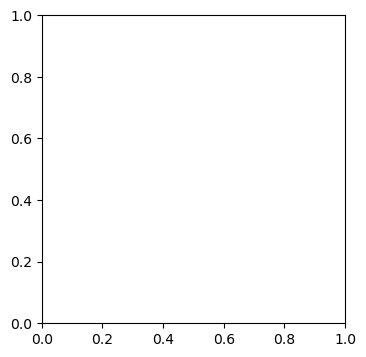

In [57]:
import matplotlib.pyplot as plt

# These variables should come from your previous code:
# - y_test['force']: actual force values from test set
# - predictions: list of y_pred for each model (from your main workflow)
# - model_names: list of model name strings (from your main workflow)
# - force column index: usually 1, if targets = ["depth", "force", "position"]

force_idx = 1  # Index for "force" in your target list

plt.figure(figsize=(18, 4))
for i, model_name in enumerate(model_names):
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_test.iloc[:, force_idx], predictions[i][:, force_idx], alpha=0.7)
    plt.plot([y_test.iloc[:, force_idx].min(), y_test.iloc[:, force_idx].max()],
             [y_test.iloc[:, force_idx].min(), y_test.iloc[:, force_idx].max()], 'r--')
    plt.xlabel("Actual Force")
    plt.ylabel("Predicted Force")
    plt.title(f"{model_name}\n(R²: {r2_scores[i][force_idx]:.3f})")

plt.tight_layout()
plt.show()
